In [7]:
test = "hello world"
print(test)

hello world


In [1]:
import pandas as pd 
import numpy as np
import csv as csv
import seaborn as sns

In [2]:
pseFull = pd.read_csv("hdx_hapi_refugees_pse.csv")
pseFull

,origin_location_code,origin_has_hrp,origin_in_gho,asylum_location_code,asylum_has_hrp,asylum_in_gho,population_group,gender,age_range,min_age,max_age,population,reference_period_start,reference_period_end
0,#country+code+origin,#meta+has_hrp+origin,#meta+in_gho+origin,#country+code+asylum,#meta+has_hrp+asylum,#meta+in_gho+asylum,#population_group+code,#gender+code,#age+range,#age+min,#age+max,#population,#date+start,#date+end
1,PSE,False,True,ALB,False,False,REF,f,0-4,0,4,0,2020-01-01,2020-12-31
2,PSE,False,True,ALB,False,False,REF,f,5-11,5,11,0,2020-01-01,2020-12-31
3,PSE,False,True,ALB,False,False,REF,f,12-17,12,17,5,2020-01-01,2020-12-31
4,PSE,False,True,ALB,False,False,REF,f,18-59,18,59,0,2020-01-01,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29662,PSE,False,True,YEM,True,True,REF,m,12-17,12,17,85,2004-01-01,2004-12-31
29663,PSE,False,True,YEM,True,True,REF,m,18-59,18,59,76,2004-01-01,2004-12-31
29664,PSE,False,True,YEM,True,True,REF,m,60+,60,NaN,0,2004-01-01,2004-12-31
29665,PSE,False,True,YEM,True,True,REF,m,all,NaN,NaN,305,2004-01-01,2004-12-31


In [3]:
#creating df with all age groups & split by sex 

pseAge = pseFull.loc[(pseFull["age_range"] == "all") & (pseFull["gender"] != "all")]
pseAge["population"] = pseAge["population"].astype(int)
pseAge


#Citations
#https://www.statology.org/pandas-select-rows-based-on-column-values/ 
#https://sentry.io/answers/change-a-column-type-in-a-dataframe-in-python-pandas/


/tmp/ipykernel_2264/396640228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pseAge["population"] = pseAge["population"].astype(int)


,origin_location_code,origin_has_hrp,origin_in_gho,asylum_location_code,asylum_has_hrp,asylum_in_gho,population_group,gender,age_range,min_age,max_age,population,reference_period_start,reference_period_end
6,PSE,False,True,ALB,False,False,REF,f,all,NaN,NaN,5,2020-01-01,2020-12-31
12,PSE,False,True,ALB,False,False,REF,m,all,NaN,NaN,0,2020-01-01,2020-12-31
19,PSE,False,True,ARE,False,False,OOC,f,all,NaN,NaN,7,2020-01-01,2020-12-31
25,PSE,False,True,ARE,False,False,OOC,m,all,NaN,NaN,7,2020-01-01,2020-12-31
32,PSE,False,True,ARE,False,False,REF,f,all,NaN,NaN,5,2020-01-01,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29639,PSE,False,True,USA,False,False,REF,m,all,NaN,NaN,0,2004-01-01,2004-12-31
29646,PSE,False,True,YEM,True,True,ASY,f,all,NaN,NaN,74,2004-01-01,2004-12-31
29652,PSE,False,True,YEM,True,True,ASY,m,all,NaN,NaN,75,2004-01-01,2004-12-31
29659,PSE,False,True,YEM,True,True,REF,f,all,NaN,NaN,135,2004-01-01,2004-12-31


<Axes: xlabel='population_group', ylabel='population'>

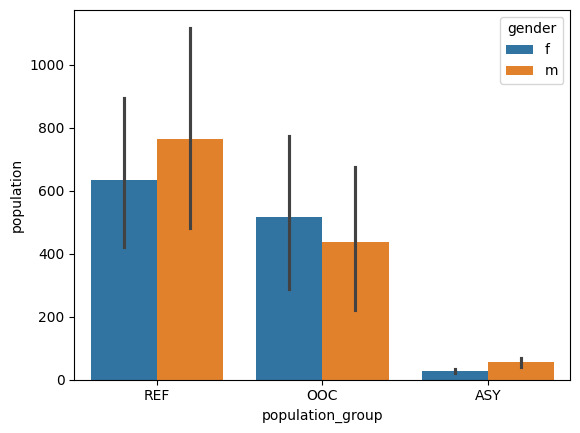

In [4]:
#plotting a barplot 
sns.barplot(pseAge, x = "population_group", y = "population", hue = "gender")


In [5]:
#new df with columns on all refugees - main dataframe 
psePopRef = pseFull.loc[(pseFull['gender'] == 'all') & (pseFull['age_range'] == 'all') & (pseFull['population_group'] == 'REF')]
psePopRef['population'] = psePopRef['population'].astype(int)
psePopRef



/tmp/ipykernel_2264/4090856659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psePopRef['population'] = psePopRef['population'].astype(int)


,origin_location_code,origin_has_hrp,origin_in_gho,asylum_location_code,asylum_has_hrp,asylum_in_gho,population_group,gender,age_range,min_age,max_age,population,reference_period_start,reference_period_end
13,PSE,False,True,ALB,False,False,REF,all,all,NaN,NaN,5,2020-01-01,2020-12-31
39,PSE,False,True,ARE,False,False,REF,all,all,NaN,NaN,15,2020-01-01,2020-12-31
65,PSE,False,True,ARG,False,True,REF,all,all,NaN,NaN,19,2020-01-01,2020-12-31
78,PSE,False,True,ARM,False,False,REF,all,all,NaN,NaN,7,2020-01-01,2020-12-31
104,PSE,False,True,AUS,False,False,REF,all,all,NaN,NaN,508,2020-01-01,2020-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29562,PSE,False,True,TUN,False,False,REF,all,all,NaN,NaN,15,2004-01-01,2004-12-31
29588,PSE,False,True,TUR,False,True,REF,all,all,NaN,NaN,15,2004-01-01,2004-12-31
29614,PSE,False,True,UKR,True,True,REF,all,all,NaN,NaN,5,2004-01-01,2004-12-31
29640,PSE,False,True,USA,False,False,REF,all,all,NaN,NaN,5,2004-01-01,2004-12-31


In [6]:
#finding to top 5 countries with Palestinian refugees in 2021
pse23 = psePopRef.loc[psePopRef['reference_period_end'] == '2023-12-31']
pse23

pse23_top10 = pse23.sort_values(by=['population'], ascending=False).head(10)
pse23_top10



,origin_location_code,origin_has_hrp,origin_in_gho,asylum_location_code,asylum_has_hrp,asylum_in_gho,population_group,gender,age_range,min_age,max_age,population,reference_period_start,reference_period_end
5603,PSE,False,True,GRC,False,False,REF,all,all,NaN,NaN,13988,2023-01-01,2023-12-31
5746,PSE,False,True,IRQ,False,True,REF,all,all,NaN,NaN,6461,2023-01-01,2023-12-31
5135,PSE,False,True,BEL,False,False,REF,all,all,NaN,NaN,5538,2023-01-01,2023-12-31
5343,PSE,False,True,CYP,False,False,REF,all,all,NaN,NaN,2407,2023-01-01,2023-12-31
5512,PSE,False,True,FRA,False,False,REF,all,all,NaN,NaN,2211,2023-01-01,2023-12-31
5369,PSE,False,True,DEU,False,False,REF,all,all,NaN,NaN,2142,2023-01-01,2023-12-31
6474,PSE,False,True,SWE,False,False,REF,all,all,NaN,NaN,1336,2023-01-01,2023-12-31
5447,PSE,False,True,ESP,False,False,REF,all,all,NaN,NaN,1234,2023-01-01,2023-12-31
5538,PSE,False,True,GBR,False,False,REF,all,all,NaN,NaN,876,2023-01-01,2023-12-31
5798,PSE,False,True,ITA,False,False,REF,all,all,NaN,NaN,826,2023-01-01,2023-12-31


Text(0.5, 1.0, 'Top countries in 2023')

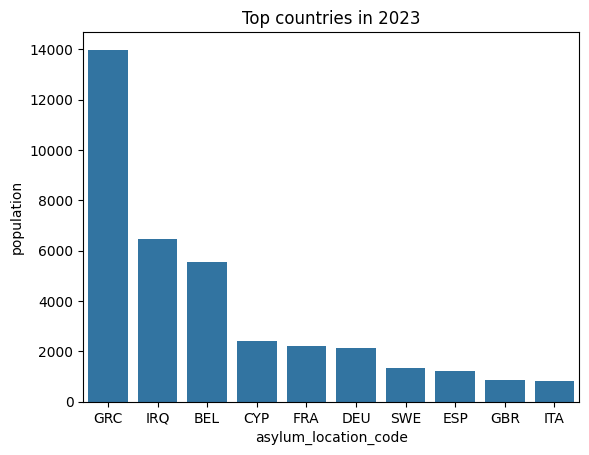

In [ ]:
#bar graph with countries for 2023 

sns.barplot(pse23_top10, x = 'asylum_location_code', y = 'population').set_title("Top countries in 2023")

#Greece had the most palestinian refugees 

In [ ]:
#Top countries of all time 
pseAll_bycountry = psePopRef.sort_values(by = ['population'], ascending = False).groupby('asylum_location_code').head(1)
pseAll_bycountry_top10 = pseAll_bycountry.head(10)
pseAll_bycountry_top10

,origin_location_code,origin_has_hrp,origin_in_gho,asylum_location_code,asylum_has_hrp,asylum_in_gho,population_group,gender,age_range,min_age,max_age,population,reference_period_start,reference_period_end
24934,PSE,False,True,SAU,False,False,REF,all,all,NaN,NaN,240025,2008-01-01,2008-12-31
27339,PSE,False,True,IRQ,False,True,REF,all,all,NaN,NaN,100000,2002-01-01,2002-12-31
21320,PSE,False,True,EGY,False,True,REF,all,all,NaN,NaN,70255,2005-01-01,2005-12-31
5603,PSE,False,True,GRC,False,False,REF,all,all,NaN,NaN,13988,2023-01-01,2023-12-31
21502,PSE,False,True,LBY,False,True,REF,all,all,NaN,NaN,8873,2005-01-01,2005-12-31
24544,PSE,False,True,KWT,False,False,REF,all,all,NaN,NaN,6000,2008-01-01,2008-12-31
5135,PSE,False,True,BEL,False,False,REF,all,all,NaN,NaN,5538,2023-01-01,2023-12-31
17121,PSE,False,True,DZA,False,False,REF,all,all,NaN,NaN,4020,2012-01-01,2012-12-31
26416,PSE,False,True,DNK,False,False,REF,all,all,NaN,NaN,2868,2001-01-01,2001-12-31
5343,PSE,False,True,CYP,False,False,REF,all,all,NaN,NaN,2407,2023-01-01,2023-12-31
